In [66]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
ls  

 Volume in drive C is Windows
 Volume Serial Number is DC25-EA40

 Directory of C:\Users\91830\FaceRecognition\Module-2

27-11-2021  10:47    <DIR>          .
27-11-2021  10:47    <DIR>          ..
27-11-2021  09:27    <DIR>          .ipynb_checkpoints
27-11-2021  00:13           129,401 f_01.png
25-11-2021  14:41         1,131,619 Module-2- 01-Image Croping.ipynb
27-11-2021  09:24           635,861 Module-2- Eigen Images.ipynb
27-11-2021  00:21         1,249,825 Module-2- image Croping.ipynb
27-11-2021  00:45           390,105 Module-2- Structuring data.ipynb
27-11-2021  08:55            14,144 Module-2-Data Preprocessing.ipynb
27-11-2021  10:47            80,487 Module-2-Training ML Model.ipynb
               7 File(s)      3,631,442 bytes
               3 Dir(s)  829,872,447,488 bytes free


In [68]:
data=np.load('/Users/91830/FaceRecognition/data/data_pca_50_y_mean.pickle.npz')
data.files    

['arr_0', 'arr_1', 'arr_2']

In [69]:
X = data['arr_0'] # arr_0 is x_pca 
y= data['arr_1']  #  arr_1 is Traget variable
mean = data['arr_2'] # arr_2 is mean

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4369, 50), (1093, 50), (4369,), (1093,))

## Training a Machine leaning model

In [71]:
# Support vector classifier is also known as maximum margine classifier
from sklearn.svm import SVC

- SVM does not consist of term probability there no any term which involve Probability because it works completely based on maximum marginal classifier.


In [72]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True,)

In [73]:
model.fit(x_train,y_train)
print('model trained sucessfully')

model trained sucessfully


In [74]:
# Score 
model.score(x_train,y_train)

0.856946669718471

In [75]:
# Score 
model.score(x_test,y_test)

0.8032936870997255

## ModeL Evaluation
- confusion Matrix
- Classification Report
- Kappa Score
- ROC and AUC (Probability)

In [76]:
from sklearn import metrics

In [77]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # proability

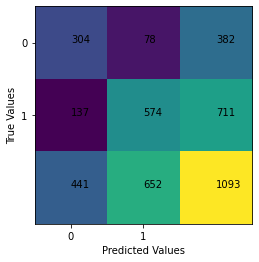

In [78]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [79]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.795812,0.689342,0.738761,441.000000
female,0.807314,0.880368,0.842260,652.000000
accuracy,0.803294,0.803294,0.803294,0.803294
macro avg,0.801563,0.784855,0.790510,1093.000000
weighted avg,0.802673,0.803294,0.800500,1093.000000


- **Kappa -->Talk about Random Accuracy**
- Kappa score > 80 best model 
- For good mode kappa score must be more than 60%
- For   kappa score < 40% it is poor model
- For Kappa score < 25% it is worst model don't consider

In [80]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5823165041813674

### ROC AND AUC 

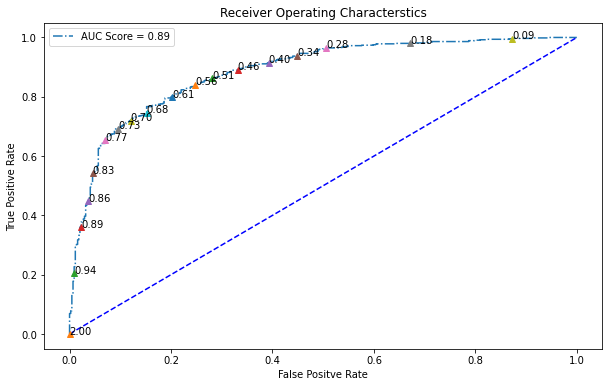

In [81]:
# Reciver opertaing characteristics & Area under the  curve
# roc for female

fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

### Hyper Parameter Running

In [82]:
# Grid search method is used to tune the ML model
model_tune = SVC()

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
# C = slack variable
# rbf kernal have infinite number of dimensions (Radial bises function)
# Degree is only used for ploy
# gamma is only used for rbf
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1],
             }

In [85]:
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

In [86]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.8s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.9s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.9s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.8s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.9s
[CV] END ...............C=1, coef0=0, gamma=0.05, kernel=rbf; total time=   2.5s
[CV] END ...............C=1, coef0=0, gamma=0.

[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   1.8s
[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   1.8s
[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   1.8s
[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   1.8s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   1.0s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   1.0s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   1.0s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   1.0s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   1.0s
[CV] END ..............C=1, coef0=1, gamma=0.005, kernel=rbf; total time=   1.7s
[CV] END ..............C=1, coef0=1, gamma=0.005, kernel=rbf; total time=   1.7s
[CV] END ..............C=1, coef0=1, gamma=0.005, kernel=rbf; total time=   1.7s
[CV] END ..............C=1, 

[CV] END ..............C=10, coef0=1, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END ..............C=10, coef0=1, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   1.9s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   1.8s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   1.9s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   1.8s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   1.8s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   1.7s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   1.6s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   1.6s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   1.6s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   1.6s
[CV] END ............C=10, c

[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   1.3s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   1.4s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   1.3s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   1.2s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   1.2s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   2.2s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   2.2s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   2.2s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   2.3s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   2.2s
[CV] END .............C=20, coef0=1, gamma=0.05, kernel=poly; total time=   1.2s
[CV] END .............C=20, coef0=1, gamma=0.05, kernel=poly; total time=   1.2s
[CV] END .............C=20, 

[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   1.4s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   1.4s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   1.4s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   2.2s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   2.2s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   2.2s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   2.1s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   2.2s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   1.4s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   1.4s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   1.3s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   1.3s
[CV] END ............C=30, c

[CV] END .............C=50, coef0=0, gamma=0.01, kernel=poly; total time=   1.6s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   2.0s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   2.0s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   1.9s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   1.9s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   2.0s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   1.4s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   1.4s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   1.4s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   1.4s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   1.4s
[CV] END .............C=50, coef0=0, gamma=0.002, kernel=rbf; total time=   2.2s
[CV] END .............C=50, 

[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   2.3s
[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   2.3s
[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   2.1s
[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   2.2s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   1.8s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   1.7s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   2.0s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   2.2s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   1.7s
[CV] END .............C=100, coef0=0, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END .............C=100, coef0=0, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END .............C=100, coef0=0, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END .............C=100,

[CV] END ............C=100, coef0=1, gamma=0.005, kernel=rbf; total time=   3.1s
[CV] END ............C=100, coef0=1, gamma=0.005, kernel=rbf; total time=   3.3s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   4.2s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   4.1s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   4.0s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   3.9s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   4.1s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [87]:
model_grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 0.05, 'kernel': 'rbf'}

In [88]:
model_grid.best_score_

0.7802978662082046

In [92]:
#With best parameters build ML model
model_best = SVC(C=30,kernel='rbf',gamma=0.002,probability=True)

In [93]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.8096980786825252

In [94]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) # proability

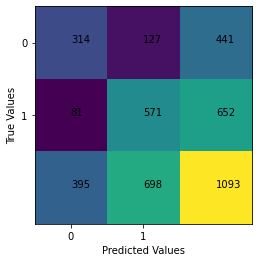

In [95]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [96]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.794937,0.712018,0.751196,441.000000
female,0.818052,0.875767,0.845926,652.000000
accuracy,0.809698,0.809698,0.809698,0.809698
macro avg,0.806494,0.793893,0.798561,1093.000000
weighted avg,0.808725,0.809698,0.807705,1093.000000


In [97]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5978760360691809

### ROC and AUC

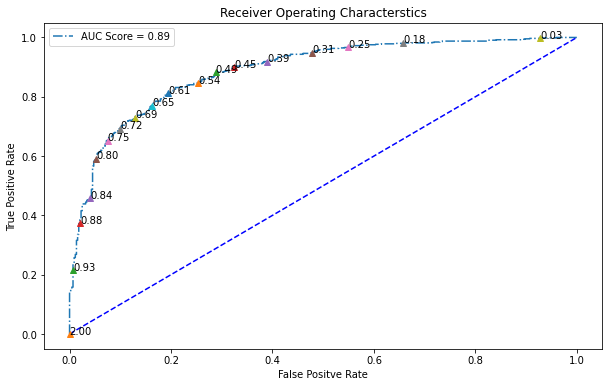

In [98]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [99]:
# save our machine learning model
import pickle

In [100]:
pickle.dump(model_best,open('model_svm.pickle','wb'))

In [104]:
pickle.dump(mean,open('/Users/91830/FaceRecognition/data/Model/mean_preprocess.pickle','wb'))